In [1]:
import os, sys

sys.path.append(os.path.abspath(os.path.join('..')))

import matplotlib.pyplot as plt

from utils.visualization import data_count_plot
from utils.visualization import plot_histogram
from utils.duplicates import prepare_duplicates, visualize_duplicates
from utils.visualization import display_image
from utils.augmentation import augment_image

from utils import data

### Loading Dataframe

In [2]:
base_path = '../data/raw/Furniture_Data'
df = data.load(base_path)

Loading beds...
Loading beds/Asian...
Loading beds/Beach...
Loading beds/Contemporary...
Loading beds/Craftsman...
Loading beds/Eclectic...
Loading beds/Farmhouse...
Loading beds/Industrial...
Loading beds/Mediterranean...
Loading beds/Midcentury...
Loading beds/Modern...
Loading beds/Rustic...
Loading beds/Scandinavian...
Loading beds/Southwestern...
Loading beds/Traditional...
Loading beds/Transitional...
Loading beds/Tropical...
Loading beds/Victorian...
Loading chairs...
Loading chairs/Asian...
Loading chairs/Beach...
Loading chairs/Contemporary...
Loading chairs/Craftsman...
Loading chairs/Eclectic...
Loading chairs/Farmhouse...
Loading chairs/Industrial...
Loading chairs/Mediterranean...
Loading chairs/Midcentury...
Loading chairs/Modern...
Loading chairs/Rustic...
Loading chairs/Scandinavian...
Loading chairs/Southwestern...
Loading chairs/Traditional...
Loading chairs/Transitional...
Loading chairs/Tropical...
Loading chairs/Victorian...
Loading dressers...
Loading dressers/Asi

In [3]:
df.describe()

,Width,Height,Ratio
count,90083.000000,90083.000000,90083.000000
mean,340.858297,340.857698,1.000001
std,32.691822,32.689399,0.000403
min,224.000000,224.000000,1.000000
25%,350.000000,350.000000,1.000000
50%,350.000000,350.000000,1.000000
75%,350.000000,350.000000,1.000000
max,500.000000,446.000000,1.121076


In [4]:
df.head()

,Path,Type,Width,Height,Ratio,Mode,Class,Style
0,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian
1,beds/Asian/20027asian-canopy-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
2,beds/Asian/20109asian-panel-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
3,beds/Asian/20508asian-platform-beds.jpg,jpg,350,350,1.0,RGB,beds,Asian
4,beds/Asian/20750asian-comforters-and-comforter...,jpg,350,350,1.0,RGB,beds,Asian


### Histogram Plot

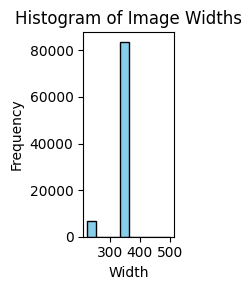

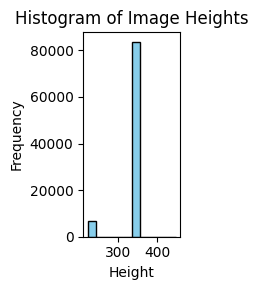

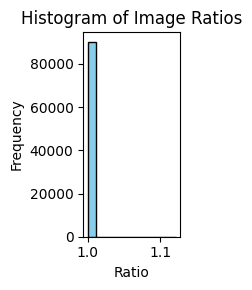

In [5]:
# Plot histograms for numerical columns
plot_histogram(df, 'Width', title='Histogram of Image Widths')
plot_histogram(df, 'Height', title='Histogram of Image Heights')
plot_histogram(df, 'Ratio', title='Histogram of Image Ratios')

C:\Users\Kiet\DataspellProjects\Image-Classification-and-Recommendation\utils\visualization.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=rotation)
C:\Users\Kiet\DataspellProjects\Image-Classification-and-Recommendation\utils\visualization.py:51: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, rotation=rotation)


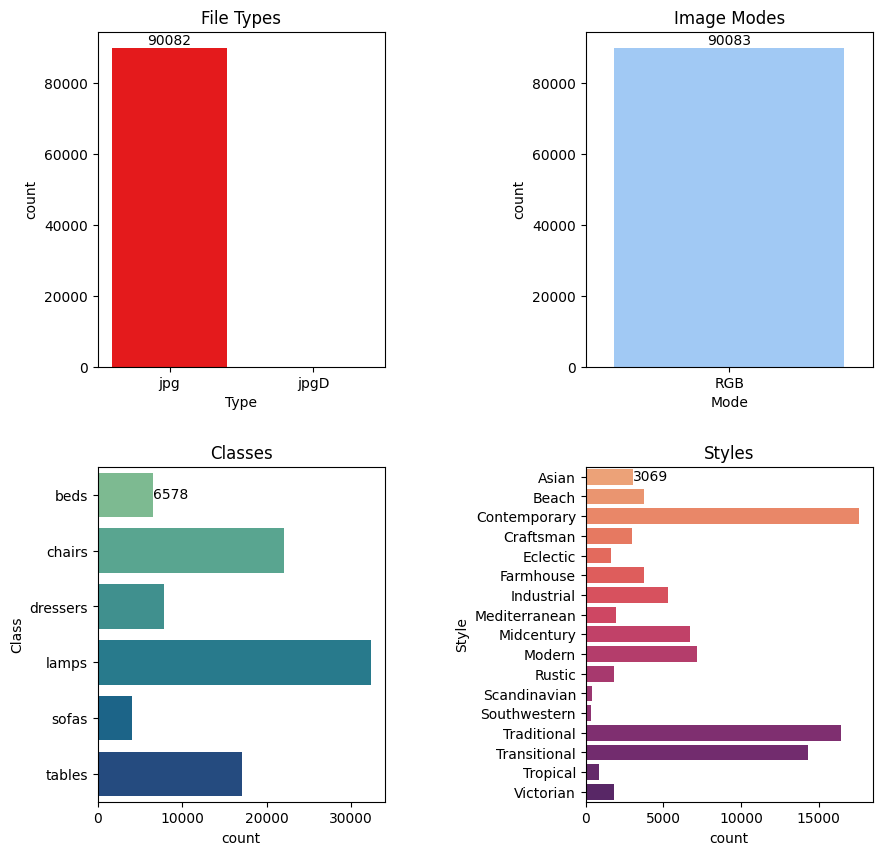

<Figure size 1000x1000 with 0 Axes>

In [6]:
# Display all in 1 plot

fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.3, wspace=0.7)

data_count_plot(df, 'Type', ax=ax[0][0], title='File Types', palette='Set1')
data_count_plot(df, 'Mode', ax=ax[0][1], title='Image Modes', palette='pastel')
data_count_plot(df, 'Class', ax=ax[1][0], horizontal=True, title='Classes', palette='crest')
data_count_plot(df, 'Style', ax=ax[1][1], horizontal=True, title='Styles', palette='flare')

fig.suptitle('Raw Dataset Statistics', fontsize=20, fontweight='bold', y=1.0)
fig.tight_layout()

# Display individually

# cols = ['Type', 'Mode', 'Class']

# for col in cols:data_count_plot(df, col, title=col)
# data_count_plot(df, 'Style', rotation=45)

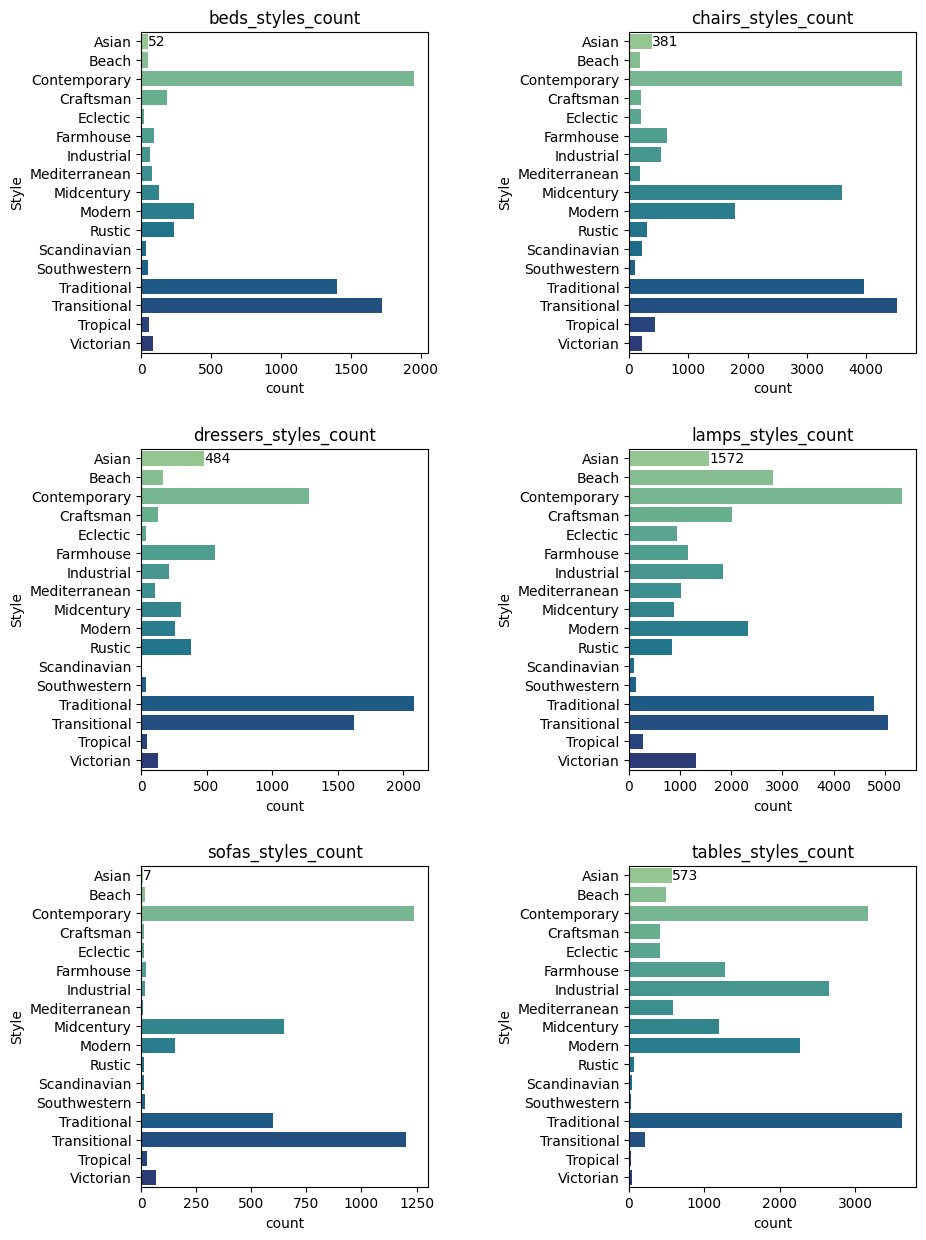

<Figure size 1000x1000 with 0 Axes>

In [7]:
classes = df['Class'].unique()

# Display all in 1 plot

fig, ax = plt.subplots(3, 2, figsize=(10, 15))
fig.subplots_adjust(hspace=0.3, wspace=0.7)
ax = ax.flatten()

for i, class_name in enumerate(classes):
    data_count_plot(df[df['Class'] == class_name], col='Style', ax=ax[i], horizontal=True, title=class_name + '_styles_count', palette='crest')

    # Display individually

# for class_name in classes:
#     data_count_plot(df[df['Class'] == class_name], col='Style', horizontal=True, title=class_name + '_styles_count')"

---
## Duplicate identifying

In [8]:
df_hashed = df.copy() 
duplicates = prepare_duplicates(df_hashed)

Calculating perceptual hash for all images...


Pandas Apply:   0%|          | 0/90083 [00:00<?, ?it/s]

Building approximate nearest neighbors using Annoy...
Identifying and grouping duplicates...


100%|██████████| 90083/90083 [00:03<00:00, 28507.24it/s]


Labelling duplicates group (non-duplicates are not included in result)...


100%|██████████| 84178/84178 [00:00<00:00, 4722498.06it/s]


Labelling duplicates type...


100%|██████████| 5684/5684 [00:11<00:00, 499.93it/s]


In [9]:
duplicates

,Group,Duplicate_Type,Path,Type,Width,Height,Ratio,Mode,Class,Style,Hash
0,1,Duplicate,beds/Asian/19726asian-daybeds.jpg,jpg,350,350,1.0,RGB,beds,Asian,eebf74aae9053ad5d568240597c2e14a3fcf97a3c2d52f...
24,1,Duplicate,beds/Asian/7634asian-daybeds.jpg,jpg,224,224,1.0,RGB,beds,Asian,eebf74aae9053ad5d568240597c2e14a3fcf97a3c2d52f...
38,2,Similar,beds/Asian/7913asian-platform-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian,b3ef377cb54043aec0c7e400ce99c0df6a0899f03f163b...
2579,2,Similar,beds/Midcentury/7883midcentury-platform-beds.jpg,jpg,224,224,1.0,RGB,beds,Midcentury,b3ef377cb54043aec0c7e400ce99c0df6a0899f03f163b...
39,3,Similar,beds/Asian/7915asian-platform-beds.jpg,jpg,224,224,1.0,RGB,beds,Asian,beff27cff0405e0ecbbfc053c803ccf8798f4f00b7747e...
...,...,...,...,...,...,...,...,...,...,...,...
88412,5682,Duplicate,tables/Traditional/16192traditional-side-table...,jpg,350,350,1.0,RGB,tables,Traditional,b33327731cce399c87e3583ce1d3c20dc871e5c6ca19e1...
89254,5683,Duplicate,tables/Traditional/17102traditional-dining-tab...,jpg,350,350,1.0,RGB,tables,Traditional,e6675bb95b3c6cc9e2cbda34c130d2429c51a5c39750ad...
88791,5683,Duplicate,tables/Traditional/16597traditional-dining-tab...,jpg,350,350,1.0,RGB,tables,Traditional,e6675bb95b3c6cc9e2cbda34c130d2429c51a5c39750ad...
89318,5684,Duplicate,tables/Traditional/17171traditional-side-table...,jpg,350,350,1.0,RGB,tables,Traditional,b3331ef63ccc3b9c4ce74d63c38ce531c360f118d4c1b0...


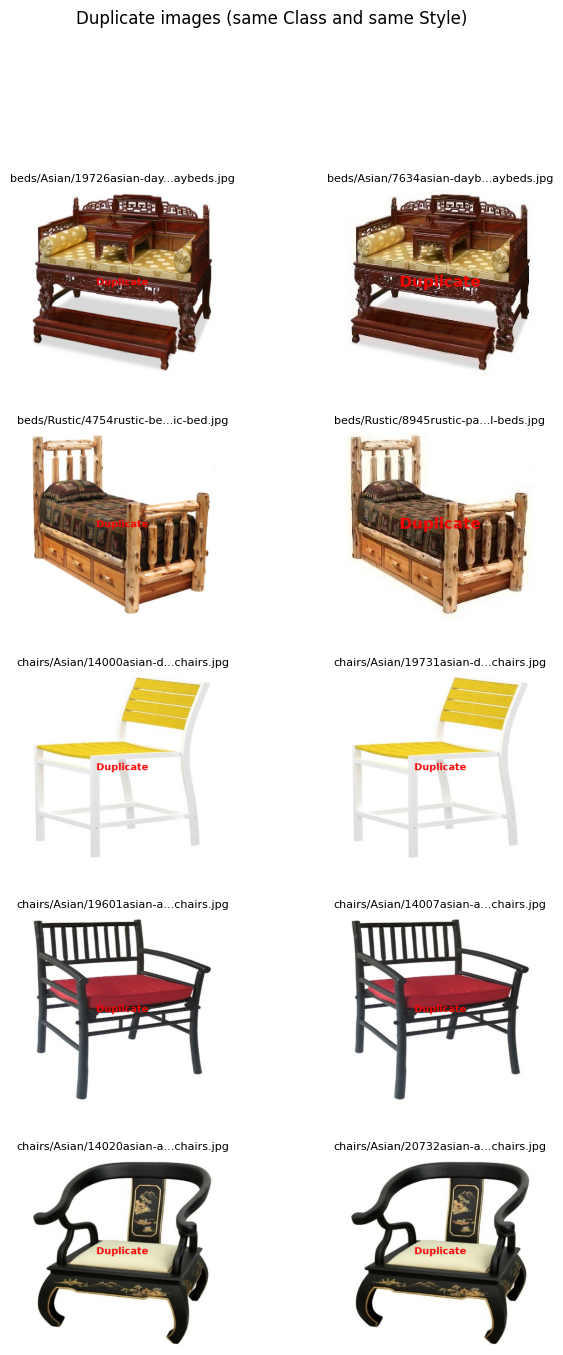

In [10]:
visualize_duplicates(duplicates[duplicates["Duplicate_Type"] == "Duplicate"], title="Duplicate images (same Class and same Style)")

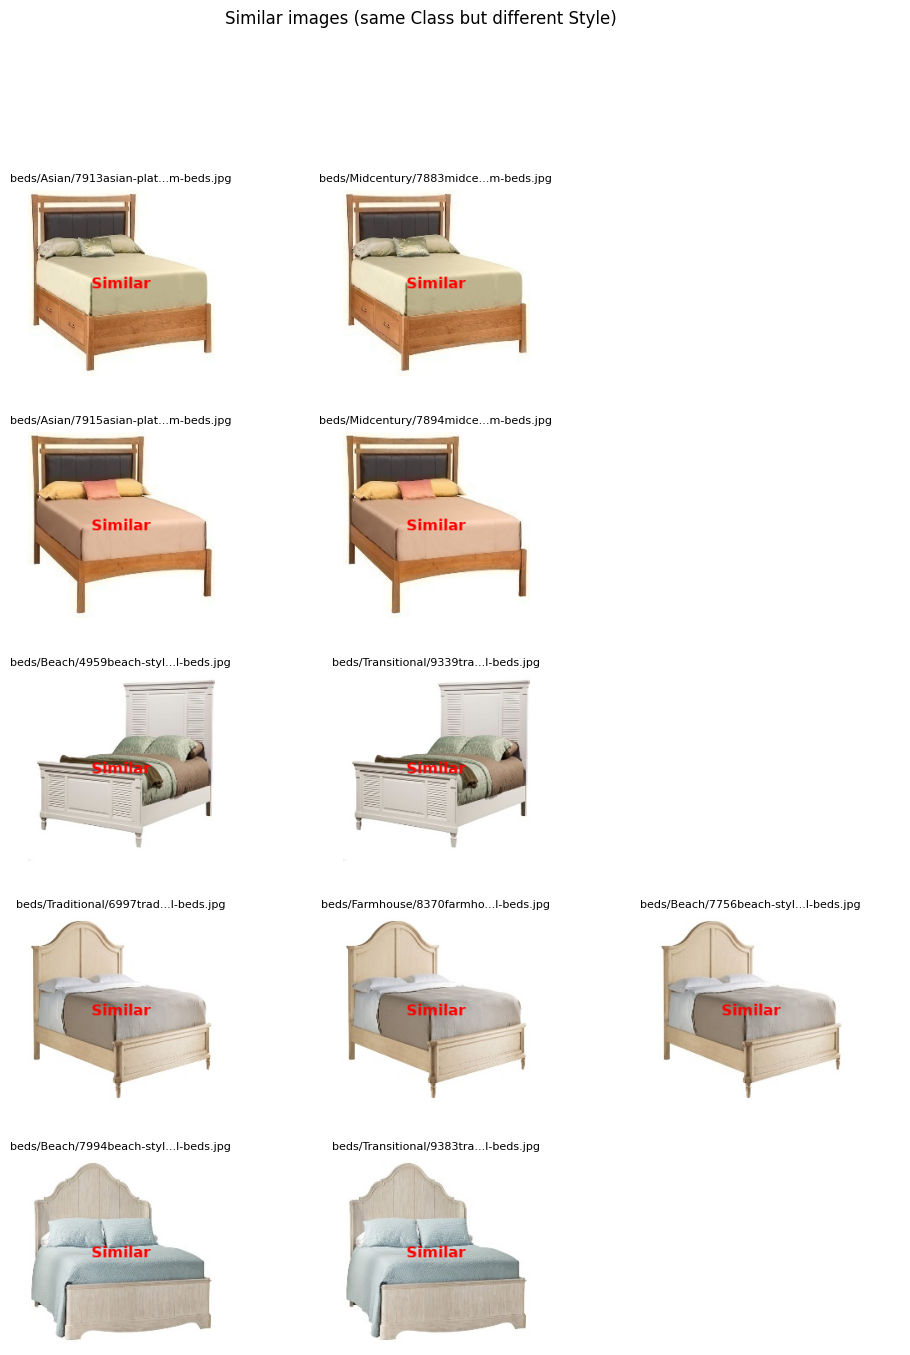

In [11]:
visualize_duplicates(duplicates[duplicates["Duplicate_Type"] == "Similar"], title="Similar images (same Class but different Style)")

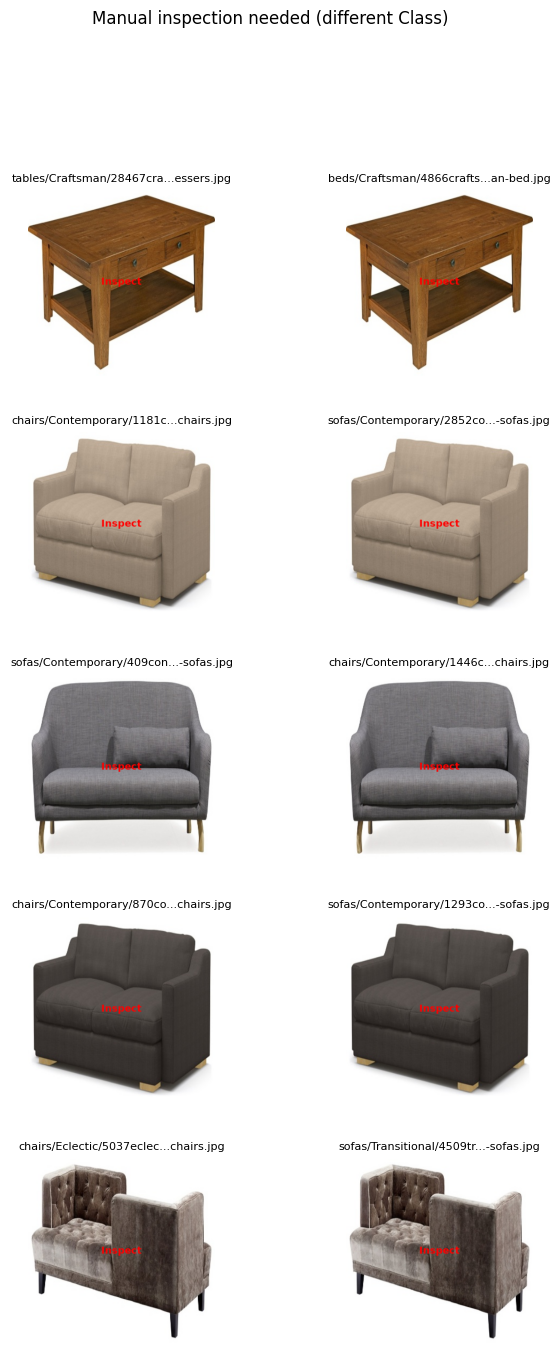

In [12]:
visualize_duplicates(duplicates[duplicates["Duplicate_Type"] == "Inspect"], title="Manual inspection needed (different Class)")

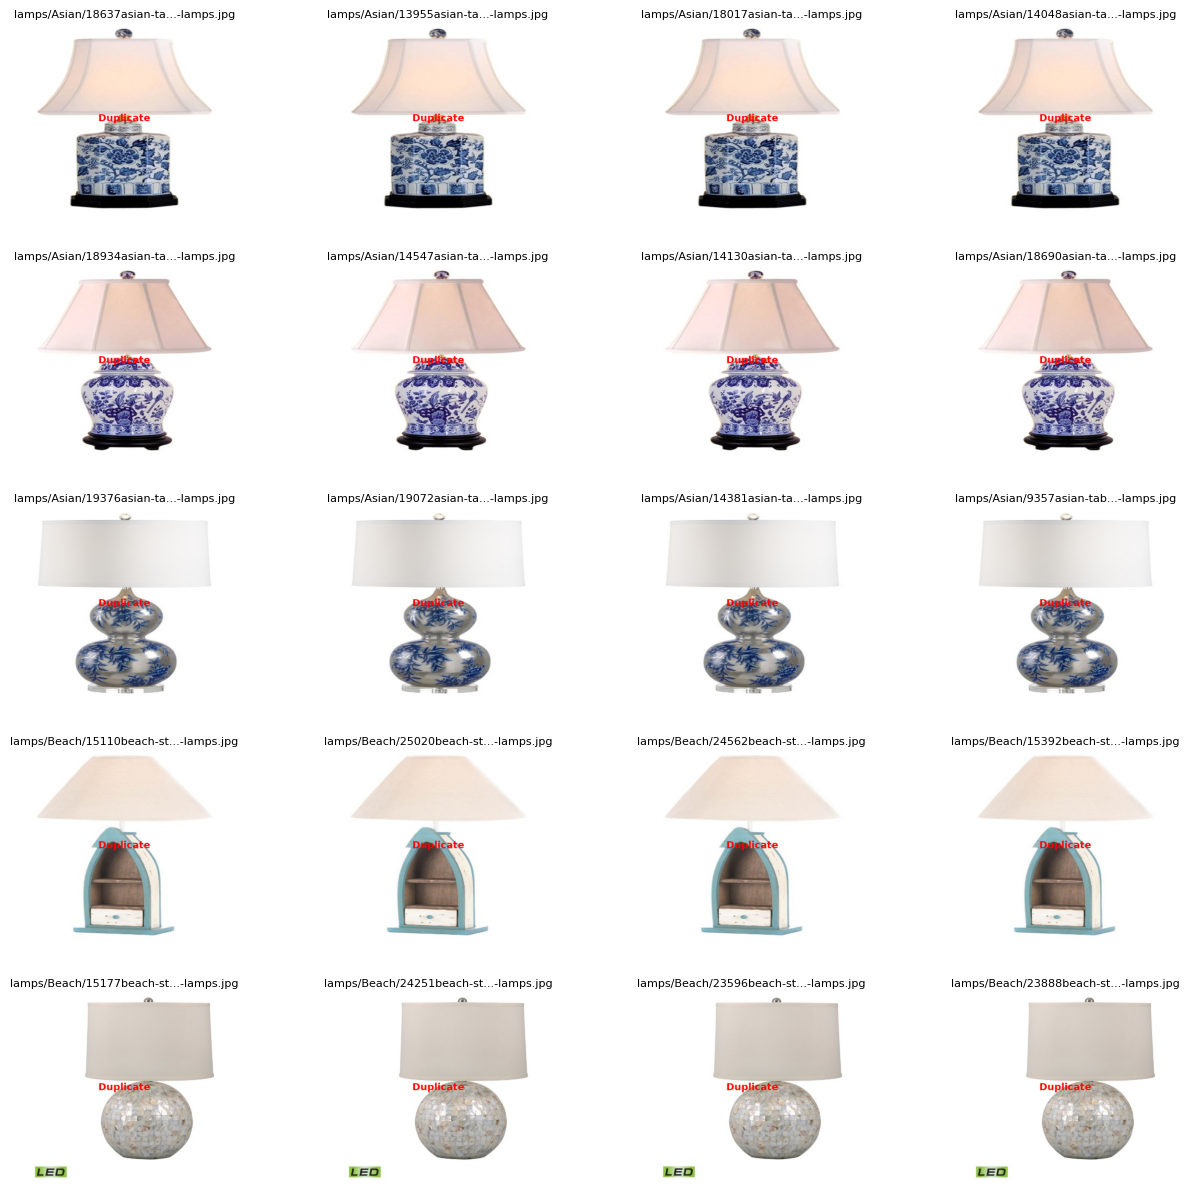

In [13]:
multiple_duplicates = duplicates[duplicates.groupby('Group')['Group'].transform('count') > 3]
visualize_duplicates(multiple_duplicates)

---
## Store data

In [ ]:
# Save to file

In [17]:
from pathlib import Path

In [19]:
processed_csv_dir = Path('../data/processed/csv')
processed_csv_dir.mkdir(parents=True, exist_ok=True)

In [20]:
duplicates.to_csv(processed_csv_dir / 'duplicates.csv', index=False)

In [21]:
df.to_csv(processed_csv_dir / 'df.csv', index=False) 